# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Mon, November 14</p>



Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Problem 1 - MNIST (15 pts)
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data. (5 pts)

    Use these parameters for your model: 
                    {hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1}
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    which parameters resulted in a more accurate model? Can you explain why? (5 pts)

3. Select 5 misclassified images and display them. (5 pts)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

ImportError: No module named model_selection

## Part 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

#first we scale our x variables
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
MLP = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', 
                    verbose=10, tol=1e-4, random_state=42, learning_rate_init=.1)
mse = make_scorer(mean_squared_error)

In [ ]:
#getting training RMSe
trainmodel = MLP.fit(X_train, y_train)
Ytrain_pred = trainmodel.predict(X_train)
train_score = mean_squared_error(y_train, Ytrain_pred)
print 'RMSE on training data:', np.sqrt(train_score)

#getting testing RMSE
testmodel = MLP.fit(X_train, y_train)
Ytest_pred = testmodel.predict(X_test)
test_score = mean_squared_error(y_test, Ytest_pred)
print 'RMSE on test data:', np.sqrt(test_score)

## Part 2

In [ ]:
from sklearn import grid_search
parameters = { 'alpha' : [0.1,0.01,0.001], 'activation' : ['logistic', 'relu'] }
clf = grid_search.GridSearchCV(MLP, parameters)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
print "{}:{}".format("Best parameters", clf.best_params_)

## Need to finish
The best parameters are (activation='relu', alpha=0.1). 

## Part 3

In [ ]:
images_and_predictions = list(zip(mnist.images[X_train], Ytrain_pred))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Question 2: Regression Trees (10 points)

In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. You will be using the same Hitters.csv dataset (available on Canvas) used in HW2 Q5 to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to split the data into training and test.

1. Build a regression using [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with max_depth = 5. Report the mean squared errors on both training and test datasets. (4)
2. Repeat Part-1 with max_depth = 2. (4)
3. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 5 and 2? Which tree is better and why? (2)

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
hitters = pd.read_csv("hitters.csv")
target = hitters['Salary']
del hitters['Salary']
X_train, X_test, y_train, y_test = train_test_split(hitters, target, test_size=0.333, random_state=42)

### Part 1

In [ ]:
DTR = DecisionTreeRegressor(max_depth=5)
model = DTR.fit(X_train, y_train)

In [ ]:
#training data
Ytrain_pred = model.predict(X_train)
train_MSE = mean_squared_error(y_train, Ytrain_pred)
print "Training data MSE:", train_MSE

#test data
Ypred_test = model.predict(X_test)
test_MSE = mean_squared_error(y_test, Ypred_test)
print "Test data MSE:", test_MSE

### Part 2

In [ ]:
DTR = DecisionTreeRegressor(max_depth=2)
model = DTR.fit(X_train, y_train)

In [ ]:
#training data
Ytrain_pred = model.predict(X_train)
train_MSE = mean_squared_error(y_train, Ytrain_pred)
print "Training data MSE:", train_MSE

#test data
Ypred_test = model.predict(X_test)
test_MSE = mean_squared_error(y_test, Ypred_test)
print "Test data MSE:", test_MSE

### Part 3

# Question 3 - Support Vector Regression vs. Linear Regression (10pts)
Download datasets 'summer_gpa_test.csv' and 'summer_gpa_train.csv' from Canvas. With this toy dataset, we want to predict GPA in Summer 2016 for students using 5 different features. So, target variable will be 'GPA_summer2016' in this problem.

In [42]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

d_train = pd.read_csv('summer_gpa_train.csv',index_col='student')
d_test = pd.read_csv('summer_gpa_test.csv',index_col='student')

y_train = d_train['GPA_summer2016']
y_test = d_test['GPA_summer2016']
x_train = d_train.drop('GPA_summer2016',axis=1)
x_test = d_test.drop('GPA_summer2016',axis=1)

$\textbf{1 :}$ Fit a support vector regression using the default options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on training data. Note that the default kernel is "rbf".  Report the root MSE for both train and test data. (2)

In [31]:
SVR_obj = SVR()
SVR_obj.fit(x_train.as_matrix(),y_train.as_matrix())

print "SVR default RBF kernel"
print "In Sample RMSE:     ", mean_squared_error(SVR_obj.predict(x_train.as_matrix()),y_train.as_matrix())
print "Out of Sample RMSE: ", mean_squared_error(SVR_obj.predict(x_test.as_matrix()),y_test.as_matrix())

SVR default RBF kernel
In Sample RMSE:      0.0305211797748
Out of Sample RMSE:  0.302134639673


$\textbf{2 :}$ Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods. (3)

In [30]:
SVR_linear = SVR(kernel="linear")
SVR_linear.fit(x_train.as_matrix(),y_train.as_matrix())

print "SVR linear kernel"
print "In Sample RMSE:     ", mean_squared_error(SVR_linear.predict(x_train.as_matrix()),y_train.as_matrix())
print "Out of Sample RMSE: ", mean_squared_error(SVR_linear.predict(x_test.as_matrix()),y_test.as_matrix())

LinReg = LinearRegression()
LinReg.fit(x_train.as_matrix(),y_train.as_matrix())

print "\nLinear Regression"
print "In Sample RMSE:     ", mean_squared_error(LinReg.predict(x_train.as_matrix()),y_train.as_matrix())
print "Out of Sample RMSE: ", mean_squared_error(LinReg.predict(x_test.as_matrix()),y_test.as_matrix())

SVR linear kernel
In Sample RMSE:      0.228453141443
Out of Sample RMSE:  0.0538091722875

Linear Regression
In Sample RMSE:      0.209819540154
Out of Sample RMSE:  0.067629714708


$\textbf{3 :}$ Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set. (1)

SVR with RBF kernel has a low in sample RMSE and a relatively high out of sample RMSE.

By comparison, SVR with a linear kernel and linear regression both have relatively relatively high in sample RMSEs and low out of sample RMSEs.

The RBF kernel likely overfits the data, while the SVR linear kernel and the linear regression model have less variance.

$\textbf{4 :}$ Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? (4)

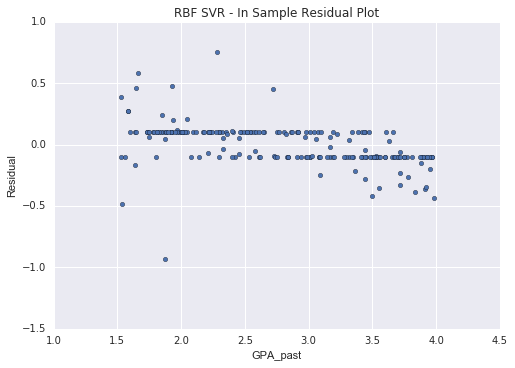

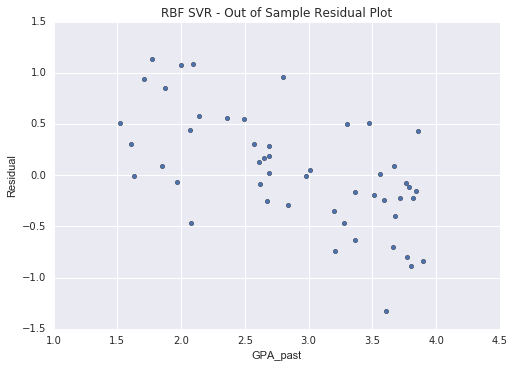

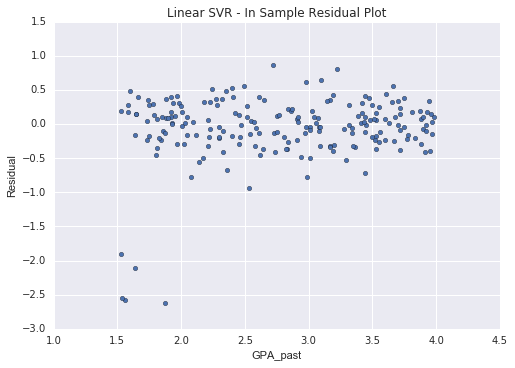

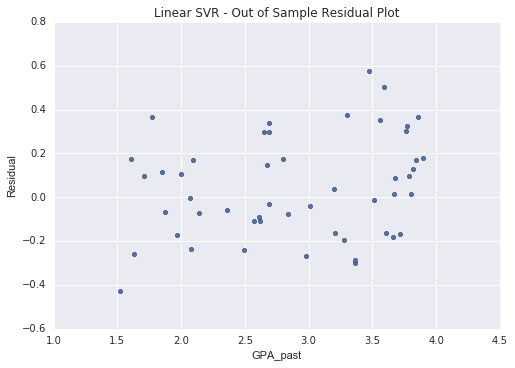

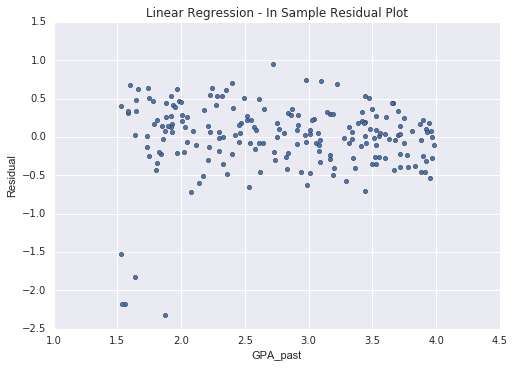

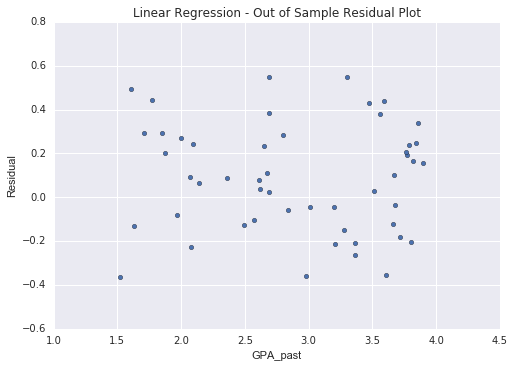

In [85]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

## RBF SVR

SVR_objDF = d_train
SVR_objDF["GPA Prediction"] = SVR_obj.predict(x_train.as_matrix())
SVR_objDF["Actual"] = y_train.as_matrix()
SVR_objDF["Residual"] = SVR_objDF.apply(lambda row: row["GPA Prediction"]-row["Actual"],axis=1)
SVR_objDF.plot(x="GPA_past",y="Residual",kind="scatter")
plt.title("RBF SVR - In Sample Residual Plot")

SVR_objDF = d_test
SVR_objDF["GPA Prediction"] = SVR_obj.predict(x_test.as_matrix())
SVR_objDF["Actual"] = y_test.as_matrix()
SVR_objDF["Residual"] = SVR_objDF.apply(lambda row: row["GPA Prediction"]-row["Actual"],axis=1)
SVR_objDF.plot(x="GPA_past",y="Residual",kind="scatter")
plt.title("RBF SVR - Out of Sample Residual Plot")


## Linear SVR 

SVR_linearDF = d_train
SVR_linearDF["GPA Prediction"] = SVR_linear.predict(x_train.as_matrix())
SVR_linearDF["Actual"] = y_train.as_matrix()
SVR_linearDF["Residual"] = SVR_linearDF.apply(lambda row: row["GPA Prediction"]-row["Actual"],axis=1)
SVR_linearDF.plot(x="GPA_past",y="Residual",kind="scatter")
plt.title("Linear SVR - In Sample Residual Plot")

SVR_linearDF = d_test
SVR_linearDF["GPA Prediction"] = SVR_linear.predict(x_test.as_matrix())
SVR_linearDF["Actual"] = y_test.as_matrix()
SVR_linearDF["Residual"] = SVR_linearDF.apply(lambda row: row["GPA Prediction"]-row["Actual"],axis=1)
SVR_linearDF.plot(x="GPA_past",y="Residual",kind="scatter")
plt.title("Linear SVR - Out of Sample Residual Plot")

## Linear Regression

LinRegDF = d_train
LinRegDF["GPA Prediction"] = LinReg.predict(x_train.as_matrix())
LinRegDF["Actual"] = y_train.as_matrix()
LinRegDF["Residual"] = LinRegDF.apply(lambda row: row["GPA Prediction"]-row["Actual"],axis=1)
LinRegDF.plot(x="GPA_past",y="Residual",kind="scatter")
plt.title("Linear Regression - In Sample Residual Plot")

LinRegDF = d_test
LinRegDF["GPA Prediction"] = LinReg.predict(x_test.as_matrix())
LinRegDF["Actual"] = y_test.as_matrix()
LinRegDF["Residual"] = LinRegDF.apply(lambda row: row["GPA Prediction"]-row["Actual"],axis=1)
LinRegDF.plot(x="GPA_past",y="Residual",kind="scatter")
plt.title("Linear Regression - Out of Sample Residual Plot")

As shown, the RBF kernel for SVR has a lower tolerance for outliers in training when compared to the linear kernel and linear regression.

# Question 4: Bayesian Networks (10 pts)
#### Part (a) (5 points)
Consider the following Bayesian network of binary (True/False) variables.

<img src="hw4q4pic1.png">

This is equivalent to saying that X and Y are conditionally independent given C, or P(X,Y|C) = P(X|C)P(Y|C). This happens to be the assumption used by the Naive Bayes classifier.

The exact probabilities are given:  
P(X = True | C = True) = .75  
P(X = True | C = False) = .5  
P(Y = True | C = True) = .25  
P(Y = True | C = False) = .5  
P(C = True) = .5

Find P(C = True | X = True, Y = True). The easiest method is to use Bayes rule, along with the conditional independence equation given above.

$$ P(C \space | \space X,Y) = \frac{P(X,Y\space  | \space C)P(C)}{P(X,Y)} $$

$$ P(X,Y\space  | \space C) = P(X\space  | \space C)P(Y\space  | \space C) $$

$$ P(C \space | \space X,Y) = \frac{P(X\space  | \space C)P(Y\space  | \space C)P(C)}{P(X,Y)} = \frac{P(X\space  | \space C)P(Y\space  | \space C)P(C)}{P(X,Y|C)+P(X,Y| \space not \space C)} = \frac{P(X\space  | \space C)P(Y\space  | \space C)P(C)}{P(X|C)P(Y|C)+P(X|\space not \space C)P(Y| \space not \space C)} $$



In [90]:
numer = 0.75*0.25*0.5
denom = (0.75*0.25)+(0.5*0.5)
print "P(C|X,Y) = ", (numer/denom)

P(C|X,Y) =  0.214285714286


$$ P(X \space | \space C) = \frac{P(C \space | \space X)P(X)}{P(C)}$$

$$ P(Y \space | \space C) = \frac{P(C \space | \space Y)P(Y)}{P(C)}$$

$$ P(C \space | \space X,Y) = \frac{\frac{P(C \space | \space X)P(X)}{P(C)}\frac{P(C \space | \space Y)P(Y)}{P(C)}P(C)}{P(X,Y)} = \frac{P(C \space | \space X)P(C \space | \space Y)P(X)P(Y)}{P(C)P(X,Y)} = \frac{P(C \space | \space X)P(C \space | \space Y)P(X,Y)}{P(C)P(X,Y)} = \frac{P(C \space | \space X)P(C \space | \space Y)}{P(C)}$$

$$ P(C \space | \space X) = \frac{P(X \space | \space C)P(C)}{P(X)}$$

$$ P(Y \space | \space C) = \frac{P(C \space | \space Y)P(Y)}{P(C)}$$

$$ P(C \space | \space X,Y) = \frac{P(C \space | \space X)P(C \space | \space Y)P(X)P(Y)}{P(C)P(X,Y)}$$

#### (b) (5 points)
A new feature Z is added, and based on prior knowledge, we believe that one of the two networks given below properly captures the dependencies among the variables. Our goal is to determine P(C|X,Y,Z). For each of these two different networks:

<img src="hw4q4pic2.png">

will P(C|X,Y,Z) be the same as P(C|X,Y) (the inference from part a)? Or will it be different? Give a separate answer for each network.

### First Network:

$$ P(C \space | \space X,Y,Z) = \frac{P(X,Y,Z\space  | \space C)P(C)}{P(X,Y,Z)} $$

$$ P(Z \space | \space C) = P(Z \space | \space X, \space C) + P(Z \space | \space Y, \space C) + P(Z \space | \space not \space Y, \space C) + P(Z \space | \space not \space X, \space C) $$

$$ P(X,Y,Z\space  | \space C) = P(X\space  | \space C)P(Y\space  | \space C) P(Z\space  | \space C) = P(X\space  | \space C)P(Y\space  | \space C) \Big( P(Z \space | \space X, \space C) + P(Z \space | \space Y, \space C) + P(Z \space | \space not \space Y, \space C) + P(Z \space | \space not \space X, \space C) \Big)$$

$$ P(C \space | \space X,Y,Z) = \frac{P(X,Y,Z\space  | \space C)P(C)}{P(X,Y,Z)} = $$

$$ = \frac{P(X\space  | \space C)P(Y\space  | \space C) \Big( P(Z \space | \space X, \space C) + P(Z \space | \space Y, \space C) + P(Z \space | \space not \space Y, \space C) + P(Z \space | \space not \space X, \space C) \Big)P(C)    }{    P(X\space  | \space  C)P(Y\space  | \space C) \Big( P(Z \space | \space X, \space C) + P(Z \space | \space Y, \space C) + P(Z \space | \space not \space Y, \space C) + P(Z \space | \space not \space X, \space C) \Big) + P(X\space  | \space not \space C)P(Y\space  | \space not \space C) \Big( P(Z \space | \space X, \space not \space C) + P(Z \space | \space Y, \space not \space C) + P(Z \space | \space not \space Y, \space not \space C) + P(Z \space | \space not \space X, \space not \space C) \Big) }$$

As shown, P(C|X,Y,Z) $\neq$ P(C|X,Y) from part a.

### Second Network:

$$ P(C \space | \space X,Y,Z) = \frac{P(X,Y,Z\space  | \space C)P(C)}{P(X,Y,Z)} $$

$$ P(C \space | \space X,Y,Z) = \frac{P(X|C)P(Z|X)P(Y|Z,C)P(C)}{P(X|C)P(Z|X)P(Y|Z,C) + P(X|\space not \space  C)P(Z|X)P(Y|Z,\space not \space C)} $$

As shown, P(C|X,Y,Z) $\neq$ P(C|X,Y) from part a.

# Question 5: Mulitclass Classification (5 points)

One way of using a binary classifier for addressing a multiclass classification problem is to use a One-vs.-All (or One-vs.-Rest)  strategy.

$\textbf{1 :}$ Briefly describe the  One-vs.-All method.  (2pts)

$\textbf{2 :}$ What are two disadvantages of using the One-vs.-All method in situations where the number of classes $N$ is very large? (3pts)

$\textbf{1:}$

In a multiclass classification problem, the One-vs-All method trains a classification model separately on each class, treating the class in question as positive and all the others as negative. The classification model must also provide a confidence interval for the classification. For each set of inputs, whichever classification model provides a positive prediction is the end resulting prediction. If multiple models are positive for a single input, whichever one has the highest confidence score is the end classification.

$\textbf{2:}$

When the number of classes is very large, for each classification model the ratio of negative to positive outcomes approaches zero. This makes training a difficulty as each model is severely weighted towards providing a negative prediction. For any single input it is more likely that no model provides a positive output, and it is more likely that the confidence scores for the models are nearly equal. It follows that the line in the sand determining which model is correct becomes thin, which in turn makes noise a greater factor in determining which model produces the higher confidence score, leading to a greater number of misclassifications.